# Essential Modules

In [33]:
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score


## **Read and Load Data**

In [34]:
df = pd.read_csv('data.csv')

In [35]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [36]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [38]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [39]:
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicates))

Number of duplicate rows: 0


In [40]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [41]:
df.drop('Unnamed: 32', axis = 1, inplace = True)

In [42]:
df.drop('id', axis = 1, inplace = True)

In [43]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [44]:
#The Diagnosis feature is converted to binary values using one-hot encoding.
df['diagnosis_encoded'] = pd.get_dummies(df['diagnosis'], drop_first=True)

In [45]:
df['diagnosis_encoded'].value_counts()

0    357
1    212
Name: diagnosis_encoded, dtype: int64

In [46]:
features_list = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

## All features should be in decimal format with a precision of four digits

In [47]:
#the features are decimal values with four significant digits
for feature in features_list:
    df[feature] = df[feature].round(4)

## Resampling & One hot encoding of diagnosis feature


In [48]:
# handling class imbalance by oversampling the minority
#The minority class is upsampled to match the majority dataset count to resolve thiss

# Separate majority and minority classes
majority_class = df[df['diagnosis_encoded'] == 0]
minority_class = df[df['diagnosis_encoded'] == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class,
                              replace=True,
                              n_samples=len(majority_class),
                              random_state=42)

# Combine the upsampled minority class with the majority class
df = pd.concat([majority_class, minority_upsampled])

In [49]:
df['diagnosis_encoded'].value_counts()

0    357
1    357
Name: diagnosis_encoded, dtype: int64

In [50]:
df.drop('diagnosis', axis = 1, inplace = True)

## MinMax Scaling

In [51]:
#MinMax scaler is also employed to bring the features of the dataset to a uniform range between 0 and 1

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the selected columns between 0 and 1
df[features_list] = scaler.fit_transform(df[features_list])

In [52]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,...,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.371800,0.341760,0.367484,0.247295,0.403449,0.318206,0.241542,0.281386,0.455472,0.265873,...,0.408168,0.320493,0.201716,0.416947,0.270896,0.239979,0.437093,0.269670,0.250647,0.500000
std,0.179120,0.144274,0.180815,0.168228,0.121702,0.184989,0.197126,0.205364,0.154104,0.145003,...,0.173101,0.184417,0.163436,0.144488,0.172627,0.163992,0.229614,0.122686,0.146457,0.500351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.241209,0.246703,0.235523,0.129777,0.315884,0.170976,0.082357,0.115432,0.343880,0.160865,...,0.284576,0.180886,0.088847,0.323481,0.146579,0.110064,0.253436,0.195052,0.145975,0.000000
50%,0.336220,0.331417,0.336328,0.198006,0.402076,0.290753,0.197634,0.239811,0.445039,0.246835,...,0.393284,0.282833,0.150769,0.419419,0.228750,0.218450,0.419072,0.252612,0.223305,0.500000
75%,0.483648,0.425431,0.468938,0.333998,0.479919,0.409247,0.357193,0.428429,0.532977,0.333333,...,0.523833,0.428258,0.273312,0.515026,0.380189,0.338179,0.609966,0.321358,0.324576,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# The First stage of feature selection

### Identifying pairs of features with a correlation coefficient higher than 0.8, one of the features is dropped to avoid multicollinearity 

(14 features will be removed and the remaining is 16) 



<AxesSubplot: >

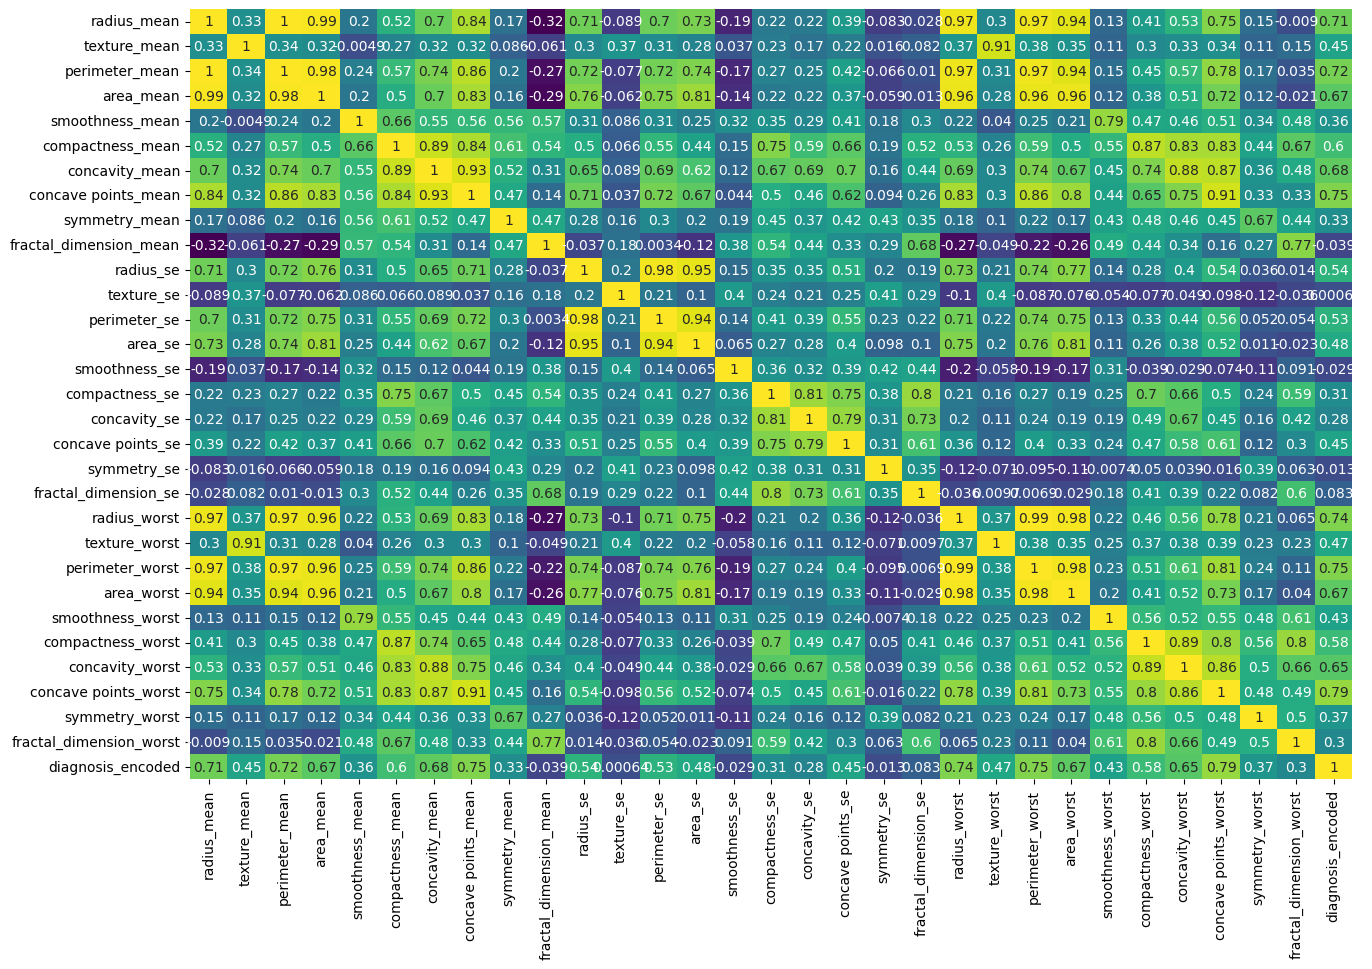

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True,cbar=False)

Set Features1

In [54]:
# Calculate the Pearson correlation matrix
corr_matrix = df.corr().abs()
# Create a mask to identify highly correlated features
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Find pairs of features with correlation coefficient > 0.8
high_corr_pairs = np.where(mask & (corr_matrix > 0.8))
# Set to store the features to drop
features_to_drop = set()
# Iterate over the indices of highly correlated feature pairs
for i, j in zip(*high_corr_pairs):
    if i != j:
        feature_i = corr_matrix.columns[i]
        feature_j = corr_matrix.columns[j]
        if feature_i not in features_to_drop:
            features_to_drop.add(feature_j)
# Drop the selected features from your dataset
df_filtered = df.drop(features_to_drop, axis=1)

In [55]:
df_filtered.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'diagnosis_encoded'],
      dtype='object')

In [56]:
extracted_features_list = [
    'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
    'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
    'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se', 'smoothness_worst', 'symmetry_worst',
    'fractal_dimension_worst', 'diagnosis_encoded'
]


Given_features_list = {
    'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
    'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
    'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
    'smoothness_worst', 'compactness_worst', 'symmetry_worst',
    'fractal_dimension_worst'
}

# Convert the list to a set for easy comparison
extracted_features_list = set(extracted_features_list)

# Find features that are in the feature list but not in set F1
not_common_features = extracted_features_list - Given_features_list

# Convert back to a list if required
not_common_features_list = list(not_common_features)

# Print or use the features that are not common between the list and set F1
print("Features that are in the list but not in set F1:")
print(not_common_features_list)


Features that are in the list but not in set F1:
['concave points_se', 'diagnosis_encoded', 'radius_se', 'compactness_mean', 'compactness_se', 'radius_mean']


# The second stage of feature selection

The second stage is based on three different methods- Recursive Feature Elimination, Logistic Regression, and Univariate Selection(ANOVA F-value)


### Recursive Feature Elimination

In [57]:
#Recursive Feature Elimination

# Load your dataset into X (features) and y (target variable)
X = df.drop('diagnosis_encoded', axis = True)
y = df['diagnosis_encoded']

X_minimal = df[['texture_mean', 'area_mean', 'concavity_mean', 'fractal_dimension_mean', 'area_se', 'smoothness_worst', 'compactness_worst', 'symmetry_worst']]
# Create an instance of the Extra Trees classifier
estimator = ExtraTreesClassifier()

# Create the RFE object with the Extra Trees classifier and the desired number of features to keep
rfe = RFE(estimator, n_features_to_select=8)

# Perform RFE feature selection
X_RFE_selected = rfe.fit_transform(X, y)

# Extract the selected features using the support_ attribute of the RFE object
selected_RFE_indices = rfe.support_

# Get the names of the selected features
X_RFE_selected = X.columns[selected_RFE_indices]

# Print or use the selected features
print(f"Top 8 features by RFE: {X_RFE_selected}")

Top 8 features by RFE: Index(['radius_mean', 'perimeter_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')


### Logistic Regression

In [58]:
# # Create and fit the Logistic Regression model
# model = LogisticRegression(solver='liblinear')
# model.fit(X, y)

# # Calculate feature importance coefficients
# coefficients = model.coef_.ravel()

# # Create feature selection object
# selector = SelectFromModel(model, max_features=8)

# # Sort features by their absolute coefficient value
# sorted_features = np.argsort(np.abs(coefficients))[::-1]

# # Select the top 8 features
# top_8_features = sorted_features[:8]

# # Print the top 8 features
# print(f"Top 8 features (by importance): {X.columns[top_8_features]}")

# #save the top 8 features
# X_LR_selected = X[X.columns[top_8_features]]

In [59]:
# Separate features and target variable
X = df.drop('diagnosis_encoded', axis=True)
y = df['diagnosis_encoded']

# Create and fit the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X, y)

# Create feature selection object
selector = SelectFromModel(model, max_features=8)

# Fit the selector and get the transformed features
X_LR_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support()

# Get the names of the selected features
X_LR_selected= X.columns[selected_indices]

# Print or use the selected features
print(f"Top 8 features LR: {X_LR_selected}")


Top 8 features LR: Index(['concavity_mean', 'concave points_mean', 'fractal_dimension_mean',
       'radius_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


### Univariate Selection(ANOVA F-value)



In [60]:
X = df.drop('diagnosis_encoded', axis = True)
y = df['diagnosis_encoded']

# Create feature selection object
selector = SelectKBest(f_classif, k=8)

# Fit the feature selection object
selector.fit_transform(X, y)

# Get the selected feature indices
selected_features = selector.get_support(indices=True)

ANOVA_selected = X.columns[selected_features]
# Print the selected features
print(f"Top 8 features by ANOVA F-value: {ANOVA_selected}")

Top 8 features by ANOVA F-value: Index(['radius_mean', 'perimeter_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


In [61]:
# Create an empty set to store the final selected features
final_features = set()

# Check each feature in the selected features of each method
for feature in X_RFE_selected:
    if feature in X_LR_selected or feature in ANOVA_selected:
        final_features.add(feature)

# Check remaining features in method2 and method3
for feature in X_LR_selected:
    if feature not in final_features and feature in ANOVA_selected:
        final_features.add(feature)

for feature in ANOVA_selected:
    if feature not in final_features:
        final_features.add(feature)

# Convert set to list for further processing
final_features_list = list(final_features)

# Print the final list of selected features
print(f"Features recommended by at least two methods: {final_features_list}")



Features recommended by at least two methods: ['perimeter_worst', 'concave points_worst', 'area_worst', 'radius_worst', 'perimeter_mean', 'concavity_mean', 'radius_mean', 'concave points_mean']


In [62]:
F2 = {
    'texture_mean', 'area_mean', 'concavity_mean', 'fractal_dimension_mean',
    'area_se', 'smoothness_worst', 'compactness_worst', 'symmetry_worst'
}

extracted_features = [
    'perimeter_worst', 'concave points_worst', 'concavity_mean', 'radius_mean', 'perimeter_mean', 'area_worst', 'radius_worst', 'concave points_mean'
]
# Convert recommended features to a set for easy comparison
set_recommended_features = set(extracted_features)

# Find features in F2 that are not common with the recommended features
not_common_features = set(F2) - set_recommended_features

# Display features that are in F2 but not in the recommended list
print("Features in F2 but not common with our extracted features:")
print(list(not_common_features))


Features in F2 but not common with our extracted features:
['fractal_dimension_mean', 'texture_mean', 'area_se', 'compactness_worst', 'area_mean', 'smoothness_worst', 'symmetry_worst']


# Model Development

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


# Models with default parameters
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
mlp_classifier = MLPClassifier()
knn_classifier = KNeighborsClassifier()

models = {
    'Random Forest': rf_classifier,
    'Support Vector Machine': svm_classifier,
    'Decision Tree': dt_classifier,
    'Multilayer Perceptron': mlp_classifier,
    'K-Nearest Neighbors': knn_classifier
}

# 5-fold cross-validation with recall scoring
for model_name, model in models.items():
    recall_scores_initial = cross_val_score(model, X, y, cv=5, scoring='recall')
    # recall_scores_minimal = cross_val_score(model, X_minimal, y, cv=5, scoring='recall')

    print("Model:", model_name)
    print("Recall Scores (Initial Dataset):", recall_scores_initial)


In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest classifier
random_forest = RandomForestClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, scoring='recall', cv=5)
grid_search.fit(X, y)

# Get the best parameters and the best recall score
best_params = grid_search.best_params_
best_recall_score = grid_search.best_score_

print("Random Forest - Grid Search Results:")
print(f"Best Parameters: {best_params}")
print(f"Best Recall Score: {best_recall_score}")

KeyboardInterrupt: 

In [ ]:
# Define the parameter grids for grid search


svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

decision_tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}

mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

# Create the classifiers
random_forest = RandomForestClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
mlp = MLPClassifier()
knn = KNeighborsClassifier()

classifiers = [ svm, decision_tree, mlp, knn]
classifier_names = [ 'Support Vector Machine', 'Decision Tree', 'Multilayer Perceptron', 'K-Nearest Neighbors']
param_grids = [ svm_param_grid, decision_tree_param_grid, mlp_param_grid, knn_param_grid]

# Perform grid search with 5-fold cross-validation for each classifier
for classifier, classifier_name, param_grid in zip(classifiers, classifier_names, param_grids):
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='recall', cv=5)
    grid_search.fit(X, y)

    best_params = grid_search.best_params_
    best_recall_score = grid_search.best_score_

    print(f"{classifier_name} - Grid Search Results:")
    print(f"Best Parameters: {best_params}")
    print(f"Best Recall Score: {best_recall_score}")

    best_classifier = classifier.__class__(**best_params)
    best_classifier.fit(X, y)


Support Vector Machine - Grid Search Results:
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Recall Score: 0.9831768388106417
Decision Tree - Grid Search Results:
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 2}
Best Recall Score: 0.9887715179968701
Multilayer Perceptron - Grid Search Results:
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'solver': 'sgd'}
Best Recall Score: 0.9747261345852894
K-Nearest Neighbors - Grid Search Results:
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
Best Recall Score: 0.9887323943661972


In [ ]:
# Hyperparameters tuning for Random Forest
param_grid = {
    'n_estimators': [200],
    'criterion': ['gini'],
    'max_depth': [10],
    'max_features': ['log2'],
    'min_samples_split': [2]
}

rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='recall')
grid_search.fit(X, y)

print("Random Forest - Best Parameters:", grid_search.best_params_)
print("Random Forest - Best Recall Score:", grid_search.best_score_)

Random Forest - Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - Best Recall Score: 0.991549295774648
